In [1]:
# !pip install xlrd

In [22]:
# 기본
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import font_manager, rc
import platform
from tqdm import tqdm
import sklearn
from sklearn import linear_model
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

# crawling
import requests
import lxml.html
import sqlite3
from pandas.io import sql
from bs4 import BeautifulSoup

# 한글 폰트 설정
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [23]:
MM2_ACTIVE = pd.read_excel('MM2_ACTIVE.xlsx')
MM2_ANTHRO = pd.read_excel('MM2_ANTHRO.xlsx')
MM2_BIOCHEM_1 = pd.read_excel('MM2_BIOCHEM_1.xlsx')
MM2_BIOCHEM_2 = pd.read_excel('MM2_BIOCHEM_2.xlsx')
MM2_BIOCHEM_3 = pd.read_excel('MM2_BIOCHEM_3.xlsx')
MM2_BODYCOM = pd.read_excel('MM2_BODYCOM.xlsx')
MM2_CHXRAY = pd.read_excel('MM2_CHXRAY.xlsx')
MM2_DIET = pd.read_excel('MM2_DIET.xlsx')
MM2_DISEASE_1 = pd.read_excel('MM2_DISEASE_1.xlsx')
MM2_DISEASE_2 = pd.read_excel('MM2_DISEASE_2.xlsx')
MM2_DISEASE_3 = pd.read_excel('MM2_DISEASE_3.xlsx')

MM2_DRINK = pd.read_excel('MM2_DRINK.xlsx')
MM2_DRUG_1 = pd.read_excel('MM2_DRUG_1.xlsx')
MM2_DRUG_2 = pd.read_excel('MM2_DRUG_2.xlsx')
MM2_EKG = pd.read_excel('MM2_EKG.xlsx')

MM2_FEMD = pd.read_excel('MM2_FEMD.xlsx')
MM2_FFQNUTRI = pd.read_excel('MM2_FFQNUTRI.xlsx')
MM2_GEN = pd.read_excel('MM2_GEN.xlsx')
MM2_SMOKE = pd.read_excel('MM2_SMOKE.xlsx')
MM2_TREAT = pd.read_excel('MM2_TREAT.xlsx')

MM2_FAMHIS = pd.read_excel('MM2_FAMHIS.xlsx')

-------------------------------------------------------------

#### preprocessing

In [24]:
A01 = pd.DataFrame()
A02 = pd.DataFrame()
A03 = pd.DataFrame()
A04 = pd.DataFrame()
A05 = pd.DataFrame()
A06 = pd.DataFrame()
A07 = pd.DataFrame()

filename = ['MM2_ACTIVE', 'MM2_ANTHRO', 'MM2_BIOCHEM_1', 'MM2_BIOCHEM_2', 'MM2_BIOCHEM_3', 
           'MM2_BODYCOM', 'MM2_CHXRAY', 'MM2_DIET', 'MM2_DISEASE_1', 'MM2_DISEASE_2', 'MM2_DISEASE_3',
           'MM2_DRINK', 'MM2_DRUG_1', 'MM2_DRUG_2', 'MM2_EKG', 'MM2_FEMD', 'MM2_FFQNUTRI', 'MM2_GEN', 
           'MM2_SMOKE', 'MM2_TREAT', 'MM2_FAMHIS']

for df in filename: 
    tmp = pd.read_excel('{}.xlsx'.format(df))
    
    for i in range(len(tmp.columns)): 
        if tmp.columns[i].startswith('A01'): 
            colname = tmp.columns[i]
            A01 = pd.concat([A01, tmp[colname]], axis = 1)
            
        if tmp.columns[i].startswith('A02'): 
            colname = tmp.columns[i]
            A02 = pd.concat([A02, tmp[colname]], axis = 1)
            
        if tmp.columns[i].startswith('A03'): 
            colname = tmp.columns[i]
            A03 = pd.concat([A03, tmp[colname]], axis = 1)
            
        if tmp.columns[i].startswith('A04'): 
            colname = tmp.columns[i]
            A04 = pd.concat([A04, tmp[colname]], axis = 1)
            
        if tmp.columns[i].startswith('A05'): 
            colname = tmp.columns[i]
            A05 = pd.concat([A05, tmp[colname]], axis = 1)
            
        if tmp.columns[i].startswith('A06'): 
            colname = tmp.columns[i]
            A06 = pd.concat([A06, tmp[colname]], axis = 1)
            
        if tmp.columns[i].startswith('A07'): 
            colname = tmp.columns[i]
            A07 = pd.concat([A07, tmp[colname]], axis = 1)

In [25]:
tmp01 = A01.copy()
tmp02 = A02.copy()
tmp03 = A03.copy()
tmp04 = A04.copy()
tmp05 = A05.copy()
tmp06 = A06.copy()
tmp07 = A07.copy()

In [38]:
A01 = tmp01.copy()
A02 = tmp02.copy()
A03 = tmp03.copy()
A04 = tmp04.copy()
A05 = tmp05.copy()
A06 = tmp06.copy()
A07 = tmp07.copy()

In [40]:
# 공통칼럼
# NIHID, A00_SEX, A00_VISITALL

common_col = pd.DataFrame(MM2_GEN[['NIHID', 'A00_SEX', 'A00_VISITALL']])
common_col

,NIHID,A00_SEX,A00_VISITALL
0,NIH1604000095,2,6
1,NIH1604000171,1,7
2,NIH1604000338,1,7
3,NIH1604000362,2,7
4,NIH1604000424,1,4
...,...,...,...
10025,NIH1604999643,2,7
10026,NIH1604999732,1,6
10027,NIH1604999772,1,6
10028,NIH1604999929,2,4


In [41]:
# 공통칼럼 concat
A01 = pd.concat([A01, common_col], axis = 1)
A02 = pd.concat([A02, common_col], axis = 1)
A03 = pd.concat([A03, common_col], axis = 1)
A04 = pd.concat([A04, common_col], axis = 1)
A05 = pd.concat([A05, common_col], axis = 1)
A06 = pd.concat([A06, common_col], axis = 1)
A07 = pd.concat([A07, common_col], axis = 1)

In [42]:
A01['기수'] = 'A01'

A02['기수'] = 'A02'

A03['기수'] = 'A03'

A04['기수'] = 'A04'

A05['기수'] = 'A05'

A06['기수'] = 'A06'

A07['기수'] = 'A07'

In [43]:
# 칼럼명 바꾸기

for i in range(len(A01.columns)): 
        if A01.columns[i].startswith('A01'):
            A01.rename(columns = {'{}'.format(A01.columns[i]) : '{}'.format(A01.columns[i][4:])}, inplace = True)

for i in range(len(A02.columns)): 
        if A02.columns[i].startswith('A02'):
            A02.rename(columns = {'{}'.format(A02.columns[i]) : '{}'.format(A02.columns[i][4:])}, inplace = True)

for i in range(len(A03.columns)): 
        if A03.columns[i].startswith('A03'):
            A03.rename(columns = {'{}'.format(A03.columns[i]) : '{}'.format(A03.columns[i][4:])}, inplace = True)

for i in range(len(A04.columns)): 
        if A04.columns[i].startswith('A04'):
            A04.rename(columns = {'{}'.format(A04.columns[i]) : '{}'.format(A04.columns[i][4:])}, inplace = True)

for i in range(len(A05.columns)): 
        if A05.columns[i].startswith('A05'):
            A05.rename(columns = {'{}'.format(A05.columns[i]) : '{}'.format(A05.columns[i][4:])}, inplace = True)

for i in range(len(A06.columns)): 
        if A06.columns[i].startswith('A06'):
            A06.rename(columns = {'{}'.format(A06.columns[i]) : '{}'.format(A06.columns[i][4:])}, inplace = True)

for i in range(len(A07.columns)): 
        if A07.columns[i].startswith('A07'):
            A07.rename(columns = {'{}'.format(A07.columns[i]) : '{}'.format(A07.columns[i][4:])}, inplace = True)

In [47]:
lst = A01.columns.tolist()
lst

['PHYSTB',
 'PHYSIT',
 'PHYACTL',
 'PHYACTM',
 'PHYACTH',
 'AEROBFQ',
 'AEROBAM',
 'JOGFQ',
 'JOGAM',
 'SWIMFQ',
 'SWIMAM',
 'TENIFQ',
 'TENIAM',
 'GOLFFQ',
 'GOLFAM',
 'BOWLFQ',
 'BOWLAM',
 'HEALTHFQ',
 'HEALTHAM',
 'WALKFQ',
 'WALKAM',
 'CLIMBFQ',
 'CLIMBAM',
 'MET',
 'EXERCUR',
 'EXER',
 'EXERFQ',
 'EXERDU',
 'SBP_L',
 'DBP_L',
 'SBP_R',
 'DBP_R',
 'PULSE',
 'WAIST',
 'HIP',
 'HEIGHT',
 'WEIGHT',
 'DS',
 'DT',
 'DZ',
 'DP',
 'MS',
 'MT',
 'MZ',
 'MP',
 'HBA1C',
 'GLU0_ORI',
 'GLU0_TR',
 'GLU60_ORI',
 'GLU60_TR',
 'GLU120_ORI',
 'GLU120_TR',
 'TOTPRT',
 'ALBUMIN_ORI',
 'ALBUMIN_TR',
 'BUN_ORI',
 'BUN_TR',
 'CREATININ_ORI',
 'CREATININ_TR',
 'CA',
 'TOTBIL',
 'AST_ORI',
 'AST_TR',
 'ALT_ORI',
 'ALT_TR',
 'R_GTP_ORI',
 'R_GTP_TR',
 'CRP',
 'HSCRP',
 'TCHL_ORI',
 'TCHL_TR',
 'HDL_ORI',
 'HDL_TR',
 'TRIGLY_ORI',
 'TRIGLY_TR',
 'NA',
 'K',
 'CL',
 'WBC_B_ORI',
 'WBC_B_TR',
 'RBC_B_ORI',
 'RBC_B_TR',
 'HB_ORI',
 'HB_TR',
 'HCT_ORI',
 'HCT_TR',
 'PLAT_ORI',
 'PLAT_TR',
 'INS0',
 'INS60',
 '

In [54]:
# 칼럼 순서 바꾸기

A07 = A07[['기수','NIHID','A00_SEX','A00_VISITALL',
'PHYSTB',
 'PHYSIT',
 'PHYACTL',
 'PHYACTM',
 'PHYACTH',
 'AEROBFQ',
 'AEROBAM',
 'JOGFQ',
 'JOGAM',
 'SWIMFQ',
 'SWIMAM',
 'TENIFQ',
 'TENIAM',
 'GOLFFQ',
 'GOLFAM',
 'BOWLFQ',
 'BOWLAM',
 'HEALTHFQ',
 'HEALTHAM',
 'WALKFQ',
 'WALKAM',
 'CLIMBFQ',
 'CLIMBAM',
 'MET',
 'EXERCUR',
 'EXER',
 'EXERFQ',
 'EXERDU',
 'SBP_L',
 'DBP_L',
 'SBP_R',
 'DBP_R',
 'PULSE',
 'WAIST',
 'HIP',
 'HEIGHT',
 'WEIGHT',
 'DS',
 'DT',
 'DZ',
 'DP',
 'MS',
 'MT',
 'MZ',
 'MP',
 'HBA1C',
 'GLU0_ORI',
 'GLU0_TR',
 'GLU60_ORI',
 'GLU60_TR',
 'GLU120_ORI',
 'GLU120_TR',
 'TOTPRT',
 'ALBUMIN_ORI',
 'ALBUMIN_TR',
 'BUN_ORI',
 'BUN_TR',
 'CREATININ_ORI',
 'CREATININ_TR',
 'CA',
 'TOTBIL',
 'AST_ORI',
 'AST_TR',
 'ALT_ORI',
 'ALT_TR',
 'R_GTP_ORI',
 'R_GTP_TR',
 'CRP',
 'HSCRP',
 'TCHL_ORI',
 'TCHL_TR',
 'HDL_ORI',
 'HDL_TR',
 'TRIGLY_ORI',
 'TRIGLY_TR',
 'NA',
 'K',
 'CL',
 'WBC_B_ORI',
 'WBC_B_TR',
 'RBC_B_ORI',
 'RBC_B_TR',
 'HB_ORI',
 'HB_TR',
 'HCT_ORI',
 'HCT_TR',
 'PLAT_ORI',
 'PLAT_TR',
 'INS0',
 'INS60',
 'INS120',
 'RENIN',
 'PRT_U',
 'CREATINE_U',
 'URICACID_U',
 'CA_U',
 'NA_U',
 'K_U',
 'MICALBU_U',
 'ALBU_U',
 'PH_U',
 'NITRIT_U',
 'SG_U',
 'PRT16_U',
 'GLU16_U',
 'KETONE_U',
 'BILI16_U',
 'BLOOD16_U',
 'UROBILI_U',
 'COLOR_U',
 'RBC_U',
 'WBC_U',
 'EPCELL_U',
 'CASTS_U',
 'BACTERIA_U',
 'CRYSTAL1_U',
 'CRYSTAL2_U',
 'CRYSTAL3_U',
 'CRYSTAL4_U',
 'CRYSTAL5_U',
 'CRYSTAL6_U',
 'OTHER_U',
 'VITB12',
 'FOLATE',
 'FREET4',
 'TSH',
 'CD',
 'PB',
 'AL',
 'INCELL',
 'IB1_2',
 'IB1_3',
 'IB1_4',
 'EXCELL',
 'BODYPRT',
 'BODYMIN',
 'BODYFAT',
 'OBDIG1',
 'OBDIG2',
 'OBDEG',
 'CH0',
 'CH2',
 'CH3',
 'CH4',
 'CH5',
 'CH6',
 'CH7',
 'CH8',
 'CH9',
 'CH10',
 'CH11',
 'CH12',
 'CH13',
 'CH14',
 'CH15',
 'CH16',
 'CH17',
 'CH18',
 'CH19',
 'CH20',
 'CH21',
 'CH23',
 'CH24',
 'CH25',
 'CH26',
 'CH27',
 'CH28',
 'CH29',
 'CH30',
 'CH31',
 'CH32',
 'CH33',
 'BRF',
 'MEALRG',
 'OVEREAT',
 'MEALSPD',
 'AFTDNN',
 'MEATFAT',
 'HTN',
 'HTNAG',
 'HTNCU',
 'DM',
 'DMAG',
 'DMCU',
 'ULCER',
 'ULCERAG',
 'ULCERCU',
 'ALLER',
 'ALLERAG',
 'ALLERCU',
 'MI',
 'MIAG',
 'MICU',
 'THY',
 'THYAG',
 'THYCU',
 'CHF',
 'CHFAG',
 'CHFCU',
 'CAD',
 'CADAG',
 'CADCU',
 'LIP',
 'LIPAG',
 'LIPCU',
 'ASTH',
 'ASTHAG',
 'ASTHCU',
 'CLD',
 'CLDAG',
 'CLDCU',
 'PVD',
 'PVDAG',
 'PVDCU',
 'KID',
 'KIDAG',
 'KIDCU',
 'HEPA',
 'HEPAAG',
 'HEPACU',
 'TB',
 'TBAG',
 'TBCU',
 'CEVA',
 'CEVAAG',
 'CEVACU',
 'HEIN',
 'HEINAG',
 'HEINCU',
 'UTI',
 'UTIAG',
 'UTICU',
 'ARTH',
 'ARTHAG',
 'ARTHCU',
 'GOUT',
 'GOUTAG',
 'GOUTCU',
 'LCA',
 'LCAAG',
 'LCACU',
 'GCA',
 'GCAAG',
 'GCACU',
 'HCCCA',
 'HCCCAAG',
 'HCCCACU',
 'COLCA',
 'COLCAAG',
 'COLCACU',
 'PACA',
 'PACAAG',
 'PACACU',
 'UTCA',
 'UTCAAG',
 'UTCACU',
 'BRCA',
 'BRCAAG',
 'BRCACU',
 'THYCA',
 'THYCAAG',
 'THYCACU',
 'PROCA',
 'PROCAAG',
 'PROCACU',
 'GALLCA',
 'GALLCAAG',
 'GALLCACU',
 'DRINK',
 'DRDU',
 'DRQDU',
 'TAKFQ',
 'TAKAM',
 'RICEFQ',
 'RICEAM',
 'WINEFQ',
 'WINEAM',
 'SOJUFQ',
 'SOJUAM',
 'BEERFQ',
 'BEERAM',
 'HLIQFQ',
 'HLIQAM',
 'ETCNA',
 'ETCFQ',
 'ETCT',
 'ETCAM',
 'TOTALC',
 'DRUGST',
 'DRUGSTYR1',
 'DRUGSTCU',
 'DRUGSTYR2',
 'DRUGSP',
 'DRUGSPYR1',
 'DRUGSPCU',
 'DRUGSPYR2',
 'DRUGSL',
 'DRUGSLYR1',
 'DRUGSLCU',
 'DRUGSLYR2',
 'DRUGCP',
 'DRUGCPYR1',
 'DRUGCPCU',
 'DRUGCPYR2',
 'DRUGTB',
 'DRUGTBYR1',
 'DRUGTBCU',
 'DRUGTBYR2',
 'DRUGINS',
 'DRUGINSYR1',
 'DRUGINSCU',
 'DRUGINSYR2',
 'DRUGHT',
 'DRUGHTYR1',
 'DRUGHTCU',
 'DRUGHTYR2',
 'DRUGAR',
 'DRUGARYR1',
 'DRUGARCU',
 'DRUGARYR2',
 'DRUGUL',
 'DRUGULYR1',
 'DRUGULCU',
 'DRUGULYR2',
 'DRUGTH',
 'DRUGTHYR1',
 'DRUGTHCU',
 'DRUGTHYR2',
 'DRUGOR',
 'DRUGORYR1',
 'DRUGORCU',
 'DRUGORYR2',
 'DRUGFH',
 'DRUGFHYR1',
 'DRUGFHCU',
 'DRUGFHYR2',
 'DRUGOS',
 'DRUGOSYR1',
 'DRUGOSCU',
 'DRUGOSYR2',
 'DRUGDM',
 'DRUGDMYR1',
 'DRUGDMCU',
 'DRUGDMYR2',
 'DRUGICD',
 'DRUGICDYR1',
 'DRUGICDCU',
 'DRUGICDYR2',
 'DRUGDI',
 'DRUGDIYR1',
 'DRUGDICU',
 'DRUGDIYR2',
 'DRUGAS',
 'DRUGASYR1',
 'DRUGASCU',
 'DRUGASYR2',
 'DRUGLP',
 'DRUGLPYR1',
 'DRUGLPCU',
 'DRUGLPYR2',
 'EKG',
 'PMYN_C',
 'PMAG_C',
 'B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B09',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B16',
 'B17',
 'B18',
 'B19',
 'B20',
 'B21',
 'B23',
 'B24',
 'VISIT',
 'EDATE',
 'AGE',
 'MARRY',
 'INCOME',
 'SMOKE',
 'SMQYR',
 'SMQMO',
 'SMDU',
 'SMAM',
 'SMIN',
 'PACKYR',
 'PSM',
 'PSMHFQ',
 'PSMHMIN',
 'PSMOFQ',
 'PSMOMIN',
 'PSMDU',
 'TREATD1',
 'TREATD2',
 'TREATD3',
 'TREATD4',
 'TREATD5',
 'TREATD6',
 'TREATD7',
 'TREATD8',
 'TREATD9',
 'TREATD11',
 'TREATD13',
 'TREATD14',
 'TREATD15',
 'TREATD16',
 'TREATD20',
 'TREATD21',
 'TREATD22',
 'TREATD23',
 'TREATD24',
 'TREATD27',
 'TREATD18A',
 'TREATD18B',
 'TREATD18C',
 'TREATD18D',
 'TREATD18E',
 'TREATD18F',
 'TREATD18G',
 'TREATD18H',
 'TREATD18I',
 'TREATD18J',
 'FMHTN',
 'FMFHT',
 'FMFHTAG',
 'FMMHT',
 'FMMHTAG',
 'FMBHT',
 'FMBHTAG',
 'FMCHT',
 'FMCHTAG',
 'FMDM',
 'FMFDM',
 'FMFDMAG',
 'FMMDM',
 'FMMDMAG',
 'FMBDM',
 'FMBDMAG',
 'FMCDM',
 'FMCDMAG',
 'FMHEA',
 'FMFHEA',
 'FMFHEAAG',
 'FMMHEA',
 'FMMHEAAG',
 'FMBHEA',
 'FMBHEAAG',
 'FMCHEA',
 'FMCHEAAG']]

In [55]:
A01.rename(columns = {'A00_SEX' : 'SEX', 'A00_VISITALL' : 'VISITALL'}, inplace = True)

A02.rename(columns = {'A00_SEX' : 'SEX', 'A00_VISITALL' : 'VISITALL'}, inplace = True)

A03.rename(columns = {'A00_SEX' : 'SEX', 'A00_VISITALL' : 'VISITALL'}, inplace = True)

A04.rename(columns = {'A00_SEX' : 'SEX', 'A00_VISITALL' : 'VISITALL'}, inplace = True)

A05.rename(columns = {'A00_SEX' : 'SEX', 'A00_VISITALL' : 'VISITALL'}, inplace = True)

A06.rename(columns = {'A00_SEX' : 'SEX', 'A00_VISITALL' : 'VISITALL'}, inplace = True)

A07.rename(columns = {'A00_SEX' : 'SEX', 'A00_VISITALL' : 'VISITALL'}, inplace = True)

In [57]:
# A01

# A02

# A03

# A04

# A05

# A06

# A07

In [58]:
A01.to_csv('MME_A01.csv', encoding = 'euc-kr', index = False)

A02.to_csv('MME_A02.csv', encoding = 'euc-kr', index = False)

A03.to_csv('MME_A03.csv', encoding = 'euc-kr', index = False)

A04.to_csv('MME_A04.csv', encoding = 'euc-kr', index = False)

A05.to_csv('MME_A05.csv', encoding = 'euc-kr', index = False)

A06.to_csv('MME_A06.csv', encoding = 'euc-kr', index = False)

A07.to_csv('MME_A07.csv', encoding = 'euc-kr', index = False)

In [59]:
final = pd.concat([A01, A02, A03, A04, A05, A06, A07], axis = 0)
final

final.to_csv('MME_final.csv', encoding = 'euc-kr', index = False)

------------------------------------------------------------------

#### 각 기수별 전처리

In [9]:
## 필요한 변수만 추출

col = ['SEX', 'BODYFAT', 'WEIGHT', 'SMOKE', 'HEIGHT', 'WAIST', 'TCHL_ORI', 'AGE', 'SBP_R', 'SBP_L']

In [10]:
df = final[col].copy()
df

NameError: name 'final' is not defined

In [199]:
df.isna().sum()

SEX         0
BODYFAT     0
WEIGHT      0
SMOKE       0
HEIGHT      0
WAIST       0
TCHL_ORI    0
AGE         0
SBP_R       0
SBP_L       0
dtype: int64

In [200]:
# NULL CHECK

(df[col] == 66666).sum()

SEX         0
BODYFAT     0
WEIGHT      0
SMOKE       0
HEIGHT      0
WAIST       0
TCHL_ORI    0
AGE         0
SBP_R       0
SBP_L       0
dtype: int64

In [201]:
# NULL CHECK

(df[col] == 77777).sum()

SEX         0
BODYFAT     0
WEIGHT      0
SMOKE       0
HEIGHT      0
WAIST       0
TCHL_ORI    0
AGE         0
SBP_R       0
SBP_L       0
dtype: int64

In [203]:
# NULL CHECK

(df[col] == 99999).sum()

SEX            0
BODYFAT     4171
WEIGHT       255
SMOKE        187
HEIGHT       244
WAIST        227
TCHL_ORI     151
AGE            0
SBP_R        239
SBP_L        248
dtype: int64

In [205]:
# NULL CHECK

(df[col] == 55555).sum()

SEX             0
BODYFAT     18564
WEIGHT      18564
SMOKE       18564
HEIGHT      18564
WAIST       18564
TCHL_ORI    18563
AGE         18564
SBP_R       18564
SBP_L       18564
dtype: int64

In [204]:
# NULL 처리 - ALL DROP - 99999

df = df[df[col] != 99999]  # 전부 NaN으로 변경
df.dropna(inplace = True)  # drop
df.reset_index(inplace = True, drop = True)
df

,SEX,BODYFAT,WEIGHT,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L
0,2,13.4,48.0,1.0,157.5,63.0,200.0,43,94.0,98.0
1,1,15.7,75.0,3.0,175.5,81.3,215.0,42,80.0,110.0
2,2,14.7,53.6,1.0,155.6,76.4,213.0,48,100.0,104.0
3,1,19.5,88.0,3.0,174.5,94.5,128.0,47,130.0,132.0
4,2,23.4,68.8,1.0,154.7,104.0,200.0,68,120.0,120.0
...,...,...,...,...,...,...,...,...,...,...
65697,2,12.9,56.6,1.0,159.1,77.0,178.0,55,96.0,98.0
65698,2,17.9,60.9,1.0,164.1,74.0,247.0,55,94.0,90.0
65699,1,10.5,50.8,2.0,163.2,81.3,122.0,75,128.0,134.0
65700,2,27.1,63.2,1.0,153.0,85.3,236.0,53,114.0,110.0


In [206]:
# NULL 처리 - ALL DROP - 55555

df = df[df[col] != 55555]  # 전부 NaN으로 변경
df.dropna(inplace = True)  # drop
df.reset_index(inplace = True, drop = True)
df

,SEX,BODYFAT,WEIGHT,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L
0,2,13.4,48.0,1.0,157.5,63.0,200.0,43.0,94.0,98.0
1,1,15.7,75.0,3.0,175.5,81.3,215.0,42.0,80.0,110.0
2,2,14.7,53.6,1.0,155.6,76.4,213.0,48.0,100.0,104.0
3,1,19.5,88.0,3.0,174.5,94.5,128.0,47.0,130.0,132.0
4,2,23.4,68.8,1.0,154.7,104.0,200.0,68.0,120.0,120.0
...,...,...,...,...,...,...,...,...,...,...
47021,2,27.3,75.4,1.0,162.0,87.4,189.0,55.0,124.0,120.0
47022,2,12.9,56.6,1.0,159.1,77.0,178.0,55.0,96.0,98.0
47023,2,17.9,60.9,1.0,164.1,74.0,247.0,55.0,94.0,90.0
47024,1,10.5,50.8,2.0,163.2,81.3,122.0,75.0,128.0,134.0


In [207]:
# 단위 맞추기 - BODYFAT * 1000 (kg -> g)

df['BODYFAT'] = df['BODYFAT'] * 1000
df

,SEX,BODYFAT,WEIGHT,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L
0,2,13400.0,48.0,1.0,157.5,63.0,200.0,43.0,94.0,98.0
1,1,15700.0,75.0,3.0,175.5,81.3,215.0,42.0,80.0,110.0
2,2,14700.0,53.6,1.0,155.6,76.4,213.0,48.0,100.0,104.0
3,1,19500.0,88.0,3.0,174.5,94.5,128.0,47.0,130.0,132.0
4,2,23400.0,68.8,1.0,154.7,104.0,200.0,68.0,120.0,120.0
...,...,...,...,...,...,...,...,...,...,...
47021,2,27300.0,75.4,1.0,162.0,87.4,189.0,55.0,124.0,120.0
47022,2,12900.0,56.6,1.0,159.1,77.0,178.0,55.0,96.0,98.0
47023,2,17900.0,60.9,1.0,164.1,74.0,247.0,55.0,94.0,90.0
47024,1,10500.0,50.8,2.0,163.2,81.3,122.0,75.0,128.0,134.0


In [208]:
# dummy 변수 생성

dummy_cols = ['SMOKE', 'SEX']
df = pd.get_dummies(df, columns = dummy_cols)
df

,BODYFAT,WEIGHT,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,SMOKE_1.0,SMOKE_2.0,SMOKE_3.0,SEX_1,SEX_2
0,13400.0,48.0,157.5,63.0,200.0,43.0,94.0,98.0,1,0,0,0,1
1,15700.0,75.0,175.5,81.3,215.0,42.0,80.0,110.0,0,0,1,1,0
2,14700.0,53.6,155.6,76.4,213.0,48.0,100.0,104.0,1,0,0,0,1
3,19500.0,88.0,174.5,94.5,128.0,47.0,130.0,132.0,0,0,1,1,0
4,23400.0,68.8,154.7,104.0,200.0,68.0,120.0,120.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47021,27300.0,75.4,162.0,87.4,189.0,55.0,124.0,120.0,1,0,0,0,1
47022,12900.0,56.6,159.1,77.0,178.0,55.0,96.0,98.0,1,0,0,0,1
47023,17900.0,60.9,164.1,74.0,247.0,55.0,94.0,90.0,1,0,0,0,1
47024,10500.0,50.8,163.2,81.3,122.0,75.0,128.0,134.0,0,1,0,1,0


In [209]:
# SBP R,L 평균내서 새로운 칼럼으로 추가

df['SBP_AVG'] = (df['SBP_R'] + df['SBP_L']) / 2.0
df

,BODYFAT,WEIGHT,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,SMOKE_1.0,SMOKE_2.0,SMOKE_3.0,SEX_1,SEX_2,SBP_AVG
0,13400.0,48.0,157.5,63.0,200.0,43.0,94.0,98.0,1,0,0,0,1,96.0
1,15700.0,75.0,175.5,81.3,215.0,42.0,80.0,110.0,0,0,1,1,0,95.0
2,14700.0,53.6,155.6,76.4,213.0,48.0,100.0,104.0,1,0,0,0,1,102.0
3,19500.0,88.0,174.5,94.5,128.0,47.0,130.0,132.0,0,0,1,1,0,131.0
4,23400.0,68.8,154.7,104.0,200.0,68.0,120.0,120.0,1,0,0,0,1,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47021,27300.0,75.4,162.0,87.4,189.0,55.0,124.0,120.0,1,0,0,0,1,122.0
47022,12900.0,56.6,159.1,77.0,178.0,55.0,96.0,98.0,1,0,0,0,1,97.0
47023,17900.0,60.9,164.1,74.0,247.0,55.0,94.0,90.0,1,0,0,0,1,92.0
47024,10500.0,50.8,163.2,81.3,122.0,75.0,128.0,134.0,0,1,0,1,0,131.0


In [103]:
# # 이름 국건영이랑 똑같이 맞춰주기

# df.rename(columns = {'A01_BODYFAT' : '총지방량', 
#                      'A01_WEIGHT' : 'HE_wt', 
#                      'A01_HEIGHT' : 'HE_ht', 
#                      'A01_WAIST' : 'HE_wc', 
#                      'A01_TCHL_ORI' : 'HE_chol', 
#                      'A01_AGE' : 'age', 
#                      'A01_SMOKE_2.0' : 'BS3_1_2.0', 
#                      'A01_SMOKE_3.0' : 'BS3_1_1.0', 
#                      'A00_SEX_1' : 'sex_1.0', 
#                      'A01_SBP_AVG' : 'HE_sbp_tr'}, inplace = True)

In [210]:
# 안 쓸 변수들 drop

df.drop(['SBP_R', 'SBP_L', 'SMOKE_1.0', 'SEX_2'], axis = 1, inplace = True)

In [211]:
df

,BODYFAT,WEIGHT,HEIGHT,WAIST,TCHL_ORI,AGE,SMOKE_2.0,SMOKE_3.0,SEX_1,SBP_AVG
0,13400.0,48.0,157.5,63.0,200.0,43.0,0,0,0,96.0
1,15700.0,75.0,175.5,81.3,215.0,42.0,0,1,1,95.0
2,14700.0,53.6,155.6,76.4,213.0,48.0,0,0,0,102.0
3,19500.0,88.0,174.5,94.5,128.0,47.0,0,1,1,131.0
4,23400.0,68.8,154.7,104.0,200.0,68.0,0,0,0,120.0
...,...,...,...,...,...,...,...,...,...,...
47021,27300.0,75.4,162.0,87.4,189.0,55.0,0,0,0,122.0
47022,12900.0,56.6,159.1,77.0,178.0,55.0,0,0,0,97.0
47023,17900.0,60.9,164.1,74.0,247.0,55.0,0,0,0,92.0
47024,10500.0,50.8,163.2,81.3,122.0,75.0,1,0,1,131.0


In [213]:
df.to_csv('MME_final_preprocessed.csv', encoding = 'euc-kr', index = False)

----------------------------------------------------------

#### 1005 BFM < 0인 row 삭제

In [18]:
df = pd.read_csv('MME_final_preprocessed.csv', encoding = 'euc-kr')
df

,BODYFAT,WEIGHT,HEIGHT,WAIST,TCHL_ORI,AGE,SMOKE_2.0,SMOKE_3.0,SEX_1,SBP_AVG
0,13400.0,48.0,157.5,63.0,200.0,43.0,0,0,0,96.0
1,15700.0,75.0,175.5,81.3,215.0,42.0,0,1,1,95.0
2,14700.0,53.6,155.6,76.4,213.0,48.0,0,0,0,102.0
3,19500.0,88.0,174.5,94.5,128.0,47.0,0,1,1,131.0
4,23400.0,68.8,154.7,104.0,200.0,68.0,0,0,0,120.0
...,...,...,...,...,...,...,...,...,...,...
47021,27300.0,75.4,162.0,87.4,189.0,55.0,0,0,0,122.0
47022,12900.0,56.6,159.1,77.0,178.0,55.0,0,0,0,97.0
47023,17900.0,60.9,164.1,74.0,247.0,55.0,0,0,0,92.0
47024,10500.0,50.8,163.2,81.3,122.0,75.0,1,0,1,131.0


In [19]:
idx = df.loc[df['BODYFAT'] < 0].index
idx

Int64Index([23029, 24240, 24932, 40781], dtype='int64')

In [20]:
df.drop(idx, inplace = True)
df.reset_index(inplace = True, drop = True)
df

,BODYFAT,WEIGHT,HEIGHT,WAIST,TCHL_ORI,AGE,SMOKE_2.0,SMOKE_3.0,SEX_1,SBP_AVG
0,13400.0,48.0,157.5,63.0,200.0,43.0,0,0,0,96.0
1,15700.0,75.0,175.5,81.3,215.0,42.0,0,1,1,95.0
2,14700.0,53.6,155.6,76.4,213.0,48.0,0,0,0,102.0
3,19500.0,88.0,174.5,94.5,128.0,47.0,0,1,1,131.0
4,23400.0,68.8,154.7,104.0,200.0,68.0,0,0,0,120.0
...,...,...,...,...,...,...,...,...,...,...
47017,27300.0,75.4,162.0,87.4,189.0,55.0,0,0,0,122.0
47018,12900.0,56.6,159.1,77.0,178.0,55.0,0,0,0,97.0
47019,17900.0,60.9,164.1,74.0,247.0,55.0,0,0,0,92.0
47020,10500.0,50.8,163.2,81.3,122.0,75.0,1,0,1,131.0


In [21]:
df.to_csv('MME_final_preprocessed.csv', encoding = 'euc-kr', index = False)

--------------------------------------------------

#### Calculate eGFR

In [3]:
final = pd.read_csv('MME_final.csv', encoding = 'euc-kr', low_memory = False)
final

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,TREATD18A,TREATD18B,TREATD18C,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J
0,A01,NIH1604000095,2,6,1,5,7,6,4,99999,...,1,1,1,1,1,1,1,1,1,1
1,A01,NIH1604000171,1,7,0,3,8,8,0,99999,...,1,1,1,1,1,1,1,1,1,1
2,A01,NIH1604000338,1,7,2,5,3,0,7,99999,...,1,1,1,1,1,1,1,1,1,1
3,A01,NIH1604000362,2,7,0,5,4,2,2,99999,...,1,1,1,1,1,1,1,1,1,1
4,A01,NIH1604000424,1,4,8,5,8,8,0,99999,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70205,A07,NIH1604999643,2,7,66666,66666,66666,66666,66666,66666,...,1,1,1,1,1,1,1,1,1,1
70206,A07,NIH1604999732,1,6,66666,66666,66666,66666,66666,66666,...,1,1,1,1,1,1,1,1,1,1
70207,A07,NIH1604999772,1,6,66666,66666,66666,66666,66666,66666,...,1,1,1,1,1,1,1,1,1,1
70208,A07,NIH1604999929,2,4,66666,66666,66666,66666,66666,66666,...,1,1,1,1,1,1,1,1,1,1


In [4]:
## 필요한 변수만 추출
# 10.12 IB1_3 근육량 추가

col = ['기수', 'NIHID', 'SEX', 'BODYFAT', 'WEIGHT', 'SMOKE', 'HEIGHT', 'WAIST', 'TCHL_ORI', 'AGE', 'SBP_R', 'SBP_L', 'CREATININ_TR', 'IB1_3']

In [5]:
df = final[col].copy()
df

,기수,NIHID,SEX,BODYFAT,WEIGHT,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,CREATININ_TR,IB1_3
0,A01,NIH1604000095,2,13.4,48.0,1,157.5,63.0,200,43,94,98,0.90,32.8
1,A01,NIH1604000171,1,15.7,75.0,3,175.5,81.3,215,42,80,110,1.00,55.3
2,A01,NIH1604000338,1,99999.0,50.4,2,166.8,74.0,200,69,138,138,0.90,99999.0
3,A01,NIH1604000362,2,14.7,53.6,1,155.6,76.4,213,48,100,104,0.70,36.6
4,A01,NIH1604000424,1,19.5,88.0,3,174.5,94.5,128,47,130,132,0.70,64.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70205,A07,NIH1604999643,2,17.9,60.9,1,164.1,74.0,247,55,94,90,0.88,40.7
70206,A07,NIH1604999732,1,10.5,50.8,2,163.2,81.3,122,75,128,134,1.06,37.9
70207,A07,NIH1604999772,1,13.9,66.2,2,163.5,88.3,189,55,150,99999,1.54,49.8
70208,A07,NIH1604999929,2,27.1,63.2,1,153.0,85.3,236,53,114,110,0.89,34.2


In [6]:
# NULL 처리 - ALL DROP - 55555

df = df[df[col] != 55555]  # 전부 NaN으로 변경
df.dropna(inplace = True)  # drop
df.reset_index(inplace = True, drop = True)
df

,기수,NIHID,SEX,BODYFAT,WEIGHT,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,CREATININ_TR,IB1_3
0,A01,NIH1604000095,2,13.4,48.0,1.0,157.5,63.0,200.0,43.0,94.0,98.0,0.90,32.8
1,A01,NIH1604000171,1,15.7,75.0,3.0,175.5,81.3,215.0,42.0,80.0,110.0,1.00,55.3
2,A01,NIH1604000338,1,99999.0,50.4,2.0,166.8,74.0,200.0,69.0,138.0,138.0,0.90,99999.0
3,A01,NIH1604000362,2,14.7,53.6,1.0,155.6,76.4,213.0,48.0,100.0,104.0,0.70,36.6
4,A01,NIH1604000424,1,19.5,88.0,3.0,174.5,94.5,128.0,47.0,130.0,132.0,0.70,64.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51526,A07,NIH1604999640,2,12.9,56.6,1.0,159.1,77.0,178.0,55.0,96.0,98.0,0.90,41.3
51527,A07,NIH1604999643,2,17.9,60.9,1.0,164.1,74.0,247.0,55.0,94.0,90.0,0.88,40.7
51528,A07,NIH1604999732,1,10.5,50.8,2.0,163.2,81.3,122.0,75.0,128.0,134.0,1.06,37.9
51529,A07,NIH1604999772,1,13.9,66.2,2.0,163.5,88.3,189.0,55.0,150.0,99999.0,1.54,49.8


In [7]:
# NULL 처리 - ALL DROP - 66666

df = df[df[col] != 66666]  # 전부 NaN으로 변경
df.dropna(inplace = True)  # drop
df.reset_index(inplace = True, drop = True)
df

,기수,NIHID,SEX,BODYFAT,WEIGHT,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,CREATININ_TR,IB1_3
0,A01,NIH1604000095,2,13.4,48.0,1.0,157.5,63.0,200.0,43.0,94.0,98.0,0.90,32.8
1,A01,NIH1604000171,1,15.7,75.0,3.0,175.5,81.3,215.0,42.0,80.0,110.0,1.00,55.3
2,A01,NIH1604000338,1,99999.0,50.4,2.0,166.8,74.0,200.0,69.0,138.0,138.0,0.90,99999.0
3,A01,NIH1604000362,2,14.7,53.6,1.0,155.6,76.4,213.0,48.0,100.0,104.0,0.70,36.6
4,A01,NIH1604000424,1,19.5,88.0,3.0,174.5,94.5,128.0,47.0,130.0,132.0,0.70,64.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22125,A07,NIH1604999640,2,12.9,56.6,1.0,159.1,77.0,178.0,55.0,96.0,98.0,0.90,41.3
22126,A07,NIH1604999643,2,17.9,60.9,1.0,164.1,74.0,247.0,55.0,94.0,90.0,0.88,40.7
22127,A07,NIH1604999732,1,10.5,50.8,2.0,163.2,81.3,122.0,75.0,128.0,134.0,1.06,37.9
22128,A07,NIH1604999772,1,13.9,66.2,2.0,163.5,88.3,189.0,55.0,150.0,99999.0,1.54,49.8


In [8]:
# NULL 처리 - ALL DROP - 77777

df = df[df[col] != 77777]  # 전부 NaN으로 변경
df.dropna(inplace = True)  # drop
df.reset_index(inplace = True, drop = True)
df

,기수,NIHID,SEX,BODYFAT,WEIGHT,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,CREATININ_TR,IB1_3
0,A01,NIH1604000095,2,13.4,48.0,1.0,157.5,63.0,200.0,43.0,94.0,98.0,0.90,32.8
1,A01,NIH1604000171,1,15.7,75.0,3.0,175.5,81.3,215.0,42.0,80.0,110.0,1.00,55.3
2,A01,NIH1604000338,1,99999.0,50.4,2.0,166.8,74.0,200.0,69.0,138.0,138.0,0.90,99999.0
3,A01,NIH1604000362,2,14.7,53.6,1.0,155.6,76.4,213.0,48.0,100.0,104.0,0.70,36.6
4,A01,NIH1604000424,1,19.5,88.0,3.0,174.5,94.5,128.0,47.0,130.0,132.0,0.70,64.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22125,A07,NIH1604999640,2,12.9,56.6,1.0,159.1,77.0,178.0,55.0,96.0,98.0,0.90,41.3
22126,A07,NIH1604999643,2,17.9,60.9,1.0,164.1,74.0,247.0,55.0,94.0,90.0,0.88,40.7
22127,A07,NIH1604999732,1,10.5,50.8,2.0,163.2,81.3,122.0,75.0,128.0,134.0,1.06,37.9
22128,A07,NIH1604999772,1,13.9,66.2,2.0,163.5,88.3,189.0,55.0,150.0,99999.0,1.54,49.8


In [9]:
# NULL 처리 - ALL DROP - 88888

df = df[df[col] != 88888]  # 전부 NaN으로 변경
df.dropna(inplace = True)  # drop
df.reset_index(inplace = True, drop = True)
df

,기수,NIHID,SEX,BODYFAT,WEIGHT,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,CREATININ_TR,IB1_3
0,A01,NIH1604000095,2,13.4,48.0,1.0,157.5,63.0,200.0,43.0,94.0,98.0,0.90,32.8
1,A01,NIH1604000171,1,15.7,75.0,3.0,175.5,81.3,215.0,42.0,80.0,110.0,1.00,55.3
2,A01,NIH1604000338,1,99999.0,50.4,2.0,166.8,74.0,200.0,69.0,138.0,138.0,0.90,99999.0
3,A01,NIH1604000362,2,14.7,53.6,1.0,155.6,76.4,213.0,48.0,100.0,104.0,0.70,36.6
4,A01,NIH1604000424,1,19.5,88.0,3.0,174.5,94.5,128.0,47.0,130.0,132.0,0.70,64.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22125,A07,NIH1604999640,2,12.9,56.6,1.0,159.1,77.0,178.0,55.0,96.0,98.0,0.90,41.3
22126,A07,NIH1604999643,2,17.9,60.9,1.0,164.1,74.0,247.0,55.0,94.0,90.0,0.88,40.7
22127,A07,NIH1604999732,1,10.5,50.8,2.0,163.2,81.3,122.0,75.0,128.0,134.0,1.06,37.9
22128,A07,NIH1604999772,1,13.9,66.2,2.0,163.5,88.3,189.0,55.0,150.0,99999.0,1.54,49.8


In [10]:
# NULL 처리 - ALL DROP - 99999

df = df[df[col] != 99999]  # 전부 NaN으로 변경
df.dropna(inplace = True)  # drop
df.reset_index(inplace = True, drop = True)
df

,기수,NIHID,SEX,BODYFAT,WEIGHT,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,CREATININ_TR,IB1_3
0,A01,NIH1604000095,2,13.4,48.0,1.0,157.5,63.0,200.0,43.0,94.0,98.0,0.90,32.8
1,A01,NIH1604000171,1,15.7,75.0,3.0,175.5,81.3,215.0,42.0,80.0,110.0,1.00,55.3
2,A01,NIH1604000362,2,14.7,53.6,1.0,155.6,76.4,213.0,48.0,100.0,104.0,0.70,36.6
3,A01,NIH1604000424,1,19.5,88.0,3.0,174.5,94.5,128.0,47.0,130.0,132.0,0.70,64.1
4,A01,NIH1604000472,2,23.4,68.8,1.0,154.7,104.0,200.0,68.0,120.0,120.0,1.20,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19603,A07,NIH1604999446,2,27.3,75.4,1.0,162.0,87.4,189.0,55.0,124.0,120.0,0.98,45.6
19604,A07,NIH1604999640,2,12.9,56.6,1.0,159.1,77.0,178.0,55.0,96.0,98.0,0.90,41.3
19605,A07,NIH1604999643,2,17.9,60.9,1.0,164.1,74.0,247.0,55.0,94.0,90.0,0.88,40.7
19606,A07,NIH1604999732,1,10.5,50.8,2.0,163.2,81.3,122.0,75.0,128.0,134.0,1.06,37.9


In [11]:
# 단위 맞추기 - BODYFAT * 1000 (kg -> g)

df['BODYFAT'] = df['BODYFAT'] * 1000
df

,기수,NIHID,SEX,BODYFAT,WEIGHT,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,CREATININ_TR,IB1_3
0,A01,NIH1604000095,2,13400.0,48.0,1.0,157.5,63.0,200.0,43.0,94.0,98.0,0.90,32.8
1,A01,NIH1604000171,1,15700.0,75.0,3.0,175.5,81.3,215.0,42.0,80.0,110.0,1.00,55.3
2,A01,NIH1604000362,2,14700.0,53.6,1.0,155.6,76.4,213.0,48.0,100.0,104.0,0.70,36.6
3,A01,NIH1604000424,1,19500.0,88.0,3.0,174.5,94.5,128.0,47.0,130.0,132.0,0.70,64.1
4,A01,NIH1604000472,2,23400.0,68.8,1.0,154.7,104.0,200.0,68.0,120.0,120.0,1.20,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19603,A07,NIH1604999446,2,27300.0,75.4,1.0,162.0,87.4,189.0,55.0,124.0,120.0,0.98,45.6
19604,A07,NIH1604999640,2,12900.0,56.6,1.0,159.1,77.0,178.0,55.0,96.0,98.0,0.90,41.3
19605,A07,NIH1604999643,2,17900.0,60.9,1.0,164.1,74.0,247.0,55.0,94.0,90.0,0.88,40.7
19606,A07,NIH1604999732,1,10500.0,50.8,2.0,163.2,81.3,122.0,75.0,128.0,134.0,1.06,37.9


In [12]:
# SBP R,L 평균내서 새로운 칼럼으로 추가

df['SBP_AVG'] = (df['SBP_R'] + df['SBP_L']) / 2.0
df

,기수,NIHID,SEX,BODYFAT,WEIGHT,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,CREATININ_TR,IB1_3,SBP_AVG
0,A01,NIH1604000095,2,13400.0,48.0,1.0,157.5,63.0,200.0,43.0,94.0,98.0,0.90,32.8,96.0
1,A01,NIH1604000171,1,15700.0,75.0,3.0,175.5,81.3,215.0,42.0,80.0,110.0,1.00,55.3,95.0
2,A01,NIH1604000362,2,14700.0,53.6,1.0,155.6,76.4,213.0,48.0,100.0,104.0,0.70,36.6,102.0
3,A01,NIH1604000424,1,19500.0,88.0,3.0,174.5,94.5,128.0,47.0,130.0,132.0,0.70,64.1,131.0
4,A01,NIH1604000472,2,23400.0,68.8,1.0,154.7,104.0,200.0,68.0,120.0,120.0,1.20,42.8,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19603,A07,NIH1604999446,2,27300.0,75.4,1.0,162.0,87.4,189.0,55.0,124.0,120.0,0.98,45.6,122.0
19604,A07,NIH1604999640,2,12900.0,56.6,1.0,159.1,77.0,178.0,55.0,96.0,98.0,0.90,41.3,97.0
19605,A07,NIH1604999643,2,17900.0,60.9,1.0,164.1,74.0,247.0,55.0,94.0,90.0,0.88,40.7,92.0
19606,A07,NIH1604999732,1,10500.0,50.8,2.0,163.2,81.3,122.0,75.0,128.0,134.0,1.06,37.9,131.0


In [13]:
df['eGFR'] = 0.0

In [14]:
df

,기수,NIHID,SEX,BODYFAT,WEIGHT,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,CREATININ_TR,IB1_3,SBP_AVG,eGFR
0,A01,NIH1604000095,2,13400.0,48.0,1.0,157.5,63.0,200.0,43.0,94.0,98.0,0.90,32.8,96.0,0.0
1,A01,NIH1604000171,1,15700.0,75.0,3.0,175.5,81.3,215.0,42.0,80.0,110.0,1.00,55.3,95.0,0.0
2,A01,NIH1604000362,2,14700.0,53.6,1.0,155.6,76.4,213.0,48.0,100.0,104.0,0.70,36.6,102.0,0.0
3,A01,NIH1604000424,1,19500.0,88.0,3.0,174.5,94.5,128.0,47.0,130.0,132.0,0.70,64.1,131.0,0.0
4,A01,NIH1604000472,2,23400.0,68.8,1.0,154.7,104.0,200.0,68.0,120.0,120.0,1.20,42.8,120.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19603,A07,NIH1604999446,2,27300.0,75.4,1.0,162.0,87.4,189.0,55.0,124.0,120.0,0.98,45.6,122.0,0.0
19604,A07,NIH1604999640,2,12900.0,56.6,1.0,159.1,77.0,178.0,55.0,96.0,98.0,0.90,41.3,97.0,0.0
19605,A07,NIH1604999643,2,17900.0,60.9,1.0,164.1,74.0,247.0,55.0,94.0,90.0,0.88,40.7,92.0,0.0
19606,A07,NIH1604999732,1,10500.0,50.8,2.0,163.2,81.3,122.0,75.0,128.0,134.0,1.06,37.9,131.0,0.0


In [15]:
# eGFR 계산 함수

def calculate_eGFR(df): 
    tmpdf = df.copy()
    for i in range(len(tmpdf)): 
        if tmpdf['SEX'][i] == 1: # if male
            if tmpdf['CREATININ_TR'][i] <= 0.9: 
                tmpdf['eGFR'][i] = 141*((tmpdf['CREATININ_TR'][i]/0.9)**(-0.411))*(0.993**tmpdf['AGE'][i])
            else: 
                tmpdf['eGFR'][i] = 141*((tmpdf['CREATININ_TR'][i]/0.9)**(-1.209))*(0.993**tmpdf['AGE'][i])
        if tmpdf['SEX'][i] == 2: # if female[i]
            if tmpdf['CREATININ_TR'][i] <= 0.7: 
                tmpdf['eGFR'][i] = 144*((tmpdf['CREATININ_TR'][i]/0.7)**(-0.329))*(0.993**tmpdf['AGE'][i])
            else: 
                tmpdf['eGFR'][i] = 144*((tmpdf['CREATININ_TR'][i]/0.7)**(-1.209))*(0.993**tmpdf['AGE'][i])
                
    return tmpdf

In [16]:
df = calculate_eGFR(df)
df

<ipython-input-15-befab53b0807>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf['eGFR'][i] = 144*((tmpdf['CREATININ_TR'][i]/0.7)**(-1.209))*(0.993**tmpdf['AGE'][i])
<ipython-input-15-befab53b0807>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf['eGFR'][i] = 141*((tmpdf['CREATININ_TR'][i]/0.9)**(-1.209))*(0.993**tmpdf['AGE'][i])
<ipython-input-15-befab53b0807>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf['eGFR

,기수,NIHID,SEX,BODYFAT,WEIGHT,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,CREATININ_TR,IB1_3,SBP_AVG,eGFR
0,A01,NIH1604000095,2,13400.0,48.0,1.0,157.5,63.0,200.0,43.0,94.0,98.0,0.90,32.8,96.0,78.564168
1,A01,NIH1604000171,1,15700.0,75.0,3.0,175.5,81.3,215.0,42.0,80.0,110.0,1.00,55.3,95.0,92.420166
2,A01,NIH1604000362,2,14700.0,53.6,1.0,155.6,76.4,213.0,48.0,100.0,104.0,0.70,36.6,102.0,102.784214
3,A01,NIH1604000424,1,19500.0,88.0,3.0,174.5,94.5,128.0,47.0,130.0,132.0,0.70,64.1,131.0,112.380813
4,A01,NIH1604000472,2,23400.0,68.8,1.0,154.7,104.0,200.0,68.0,120.0,120.0,1.20,42.8,120.0,46.548404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19603,A07,NIH1604999446,2,27300.0,75.4,1.0,162.0,87.4,189.0,55.0,124.0,120.0,0.98,45.6,122.0,65.148191
19604,A07,NIH1604999640,2,12900.0,56.6,1.0,159.1,77.0,178.0,55.0,96.0,98.0,0.90,41.3,97.0,72.213018
19605,A07,NIH1604999643,2,17900.0,60.9,1.0,164.1,74.0,247.0,55.0,94.0,90.0,0.88,40.7,92.0,74.201919
19606,A07,NIH1604999732,1,10500.0,50.8,2.0,163.2,81.3,122.0,75.0,128.0,134.0,1.06,37.9,131.0,68.312024


In [17]:
df.loc[df['eGFR'] > 60, 'eGFR_60'] = 0
df.loc[df['eGFR'] <= 60, 'eGFR_60'] = 1

In [18]:
df

,기수,NIHID,SEX,BODYFAT,WEIGHT,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,CREATININ_TR,IB1_3,SBP_AVG,eGFR,eGFR_60
0,A01,NIH1604000095,2,13400.0,48.0,1.0,157.5,63.0,200.0,43.0,94.0,98.0,0.90,32.8,96.0,78.564168,0.0
1,A01,NIH1604000171,1,15700.0,75.0,3.0,175.5,81.3,215.0,42.0,80.0,110.0,1.00,55.3,95.0,92.420166,0.0
2,A01,NIH1604000362,2,14700.0,53.6,1.0,155.6,76.4,213.0,48.0,100.0,104.0,0.70,36.6,102.0,102.784214,0.0
3,A01,NIH1604000424,1,19500.0,88.0,3.0,174.5,94.5,128.0,47.0,130.0,132.0,0.70,64.1,131.0,112.380813,0.0
4,A01,NIH1604000472,2,23400.0,68.8,1.0,154.7,104.0,200.0,68.0,120.0,120.0,1.20,42.8,120.0,46.548404,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19603,A07,NIH1604999446,2,27300.0,75.4,1.0,162.0,87.4,189.0,55.0,124.0,120.0,0.98,45.6,122.0,65.148191,0.0
19604,A07,NIH1604999640,2,12900.0,56.6,1.0,159.1,77.0,178.0,55.0,96.0,98.0,0.90,41.3,97.0,72.213018,0.0
19605,A07,NIH1604999643,2,17900.0,60.9,1.0,164.1,74.0,247.0,55.0,94.0,90.0,0.88,40.7,92.0,74.201919,0.0
19606,A07,NIH1604999732,1,10500.0,50.8,2.0,163.2,81.3,122.0,75.0,128.0,134.0,1.06,37.9,131.0,68.312024,0.0


In [19]:
# dummy 변수 생성

dummy_cols = ['SMOKE', 'SEX']
df = pd.get_dummies(df, columns = dummy_cols)
df

,기수,NIHID,BODYFAT,WEIGHT,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,CREATININ_TR,IB1_3,SBP_AVG,eGFR,eGFR_60,SMOKE_1.0,SMOKE_2.0,SMOKE_3.0,SEX_1,SEX_2
0,A01,NIH1604000095,13400.0,48.0,157.5,63.0,200.0,43.0,94.0,98.0,0.90,32.8,96.0,78.564168,0.0,1,0,0,0,1
1,A01,NIH1604000171,15700.0,75.0,175.5,81.3,215.0,42.0,80.0,110.0,1.00,55.3,95.0,92.420166,0.0,0,0,1,1,0
2,A01,NIH1604000362,14700.0,53.6,155.6,76.4,213.0,48.0,100.0,104.0,0.70,36.6,102.0,102.784214,0.0,1,0,0,0,1
3,A01,NIH1604000424,19500.0,88.0,174.5,94.5,128.0,47.0,130.0,132.0,0.70,64.1,131.0,112.380813,0.0,0,0,1,1,0
4,A01,NIH1604000472,23400.0,68.8,154.7,104.0,200.0,68.0,120.0,120.0,1.20,42.8,120.0,46.548404,1.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19603,A07,NIH1604999446,27300.0,75.4,162.0,87.4,189.0,55.0,124.0,120.0,0.98,45.6,122.0,65.148191,0.0,1,0,0,0,1
19604,A07,NIH1604999640,12900.0,56.6,159.1,77.0,178.0,55.0,96.0,98.0,0.90,41.3,97.0,72.213018,0.0,1,0,0,0,1
19605,A07,NIH1604999643,17900.0,60.9,164.1,74.0,247.0,55.0,94.0,90.0,0.88,40.7,92.0,74.201919,0.0,1,0,0,0,1
19606,A07,NIH1604999732,10500.0,50.8,163.2,81.3,122.0,75.0,128.0,134.0,1.06,37.9,131.0,68.312024,0.0,0,1,0,1,0


In [20]:
# 안 쓸 변수들 drop

df.drop(['SBP_R', 'SBP_L', 'SMOKE_1.0', 'SEX_2'], axis = 1, inplace = True)
df

,기수,NIHID,BODYFAT,WEIGHT,HEIGHT,WAIST,TCHL_ORI,AGE,CREATININ_TR,IB1_3,SBP_AVG,eGFR,eGFR_60,SMOKE_2.0,SMOKE_3.0,SEX_1
0,A01,NIH1604000095,13400.0,48.0,157.5,63.0,200.0,43.0,0.90,32.8,96.0,78.564168,0.0,0,0,0
1,A01,NIH1604000171,15700.0,75.0,175.5,81.3,215.0,42.0,1.00,55.3,95.0,92.420166,0.0,0,1,1
2,A01,NIH1604000362,14700.0,53.6,155.6,76.4,213.0,48.0,0.70,36.6,102.0,102.784214,0.0,0,0,0
3,A01,NIH1604000424,19500.0,88.0,174.5,94.5,128.0,47.0,0.70,64.1,131.0,112.380813,0.0,0,1,1
4,A01,NIH1604000472,23400.0,68.8,154.7,104.0,200.0,68.0,1.20,42.8,120.0,46.548404,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19603,A07,NIH1604999446,27300.0,75.4,162.0,87.4,189.0,55.0,0.98,45.6,122.0,65.148191,0.0,0,0,0
19604,A07,NIH1604999640,12900.0,56.6,159.1,77.0,178.0,55.0,0.90,41.3,97.0,72.213018,0.0,0,0,0
19605,A07,NIH1604999643,17900.0,60.9,164.1,74.0,247.0,55.0,0.88,40.7,92.0,74.201919,0.0,0,0,0
19606,A07,NIH1604999732,10500.0,50.8,163.2,81.3,122.0,75.0,1.06,37.9,131.0,68.312024,0.0,1,0,1


In [21]:
# ## lmm scaling error - BODYFAT 다시 g 단위로 바꿔주기

# df['BODYFAT'] = df['BODYFAT'] / 1000
# df

In [22]:
df.to_csv('MME_preprocessed_eGFR.csv', encoding = 'euc-kr', index = False)

In [21]:
# 10.12 근육량 추가
df.to_csv('MME_preprocessed_eGFR+근육량.csv', encoding = 'euc-kr', index = False)

-----------------------------------------------------------

#### eGFR을 종속변수로 Stepwise selection

In [14]:
final = pd.read_csv('MME_final.csv', encoding = 'euc-kr', low_memory = False)
final

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,TREATD18A,TREATD18B,TREATD18C,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J
0,A01,NIH1604000095,2,6,1,5,7,6,4,99999,...,1,1,1,1,1,1,1,1,1,1
1,A01,NIH1604000171,1,7,0,3,8,8,0,99999,...,1,1,1,1,1,1,1,1,1,1
2,A01,NIH1604000338,1,7,2,5,3,0,7,99999,...,1,1,1,1,1,1,1,1,1,1
3,A01,NIH1604000362,2,7,0,5,4,2,2,99999,...,1,1,1,1,1,1,1,1,1,1
4,A01,NIH1604000424,1,4,8,5,8,8,0,99999,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70205,A07,NIH1604999643,2,7,66666,66666,66666,66666,66666,66666,...,1,1,1,1,1,1,1,1,1,1
70206,A07,NIH1604999732,1,6,66666,66666,66666,66666,66666,66666,...,1,1,1,1,1,1,1,1,1,1
70207,A07,NIH1604999772,1,6,66666,66666,66666,66666,66666,66666,...,1,1,1,1,1,1,1,1,1,1
70208,A07,NIH1604999929,2,4,66666,66666,66666,66666,66666,66666,...,1,1,1,1,1,1,1,1,1,1


In [15]:
tmp = final.copy()
tmp

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,TREATD18A,TREATD18B,TREATD18C,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J
0,A01,NIH1604000095,2,6,1,5,7,6,4,99999,...,1,1,1,1,1,1,1,1,1,1
1,A01,NIH1604000171,1,7,0,3,8,8,0,99999,...,1,1,1,1,1,1,1,1,1,1
2,A01,NIH1604000338,1,7,2,5,3,0,7,99999,...,1,1,1,1,1,1,1,1,1,1
3,A01,NIH1604000362,2,7,0,5,4,2,2,99999,...,1,1,1,1,1,1,1,1,1,1
4,A01,NIH1604000424,1,4,8,5,8,8,0,99999,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70205,A07,NIH1604999643,2,7,66666,66666,66666,66666,66666,66666,...,1,1,1,1,1,1,1,1,1,1
70206,A07,NIH1604999732,1,6,66666,66666,66666,66666,66666,66666,...,1,1,1,1,1,1,1,1,1,1
70207,A07,NIH1604999772,1,6,66666,66666,66666,66666,66666,66666,...,1,1,1,1,1,1,1,1,1,1
70208,A07,NIH1604999929,2,4,66666,66666,66666,66666,66666,66666,...,1,1,1,1,1,1,1,1,1,1


In [16]:
col = tmp.columns

#### NaN 있으면 안되는 변수
- SEX, BODYFAT, CREATININ_TR, AGE
- 4개에 대한 NaN 전부 제거하고 eGFR 계산해야 함
- 이후 stepwise

In [17]:
# 55555 ~ 99999 전부 NaN으로 대체
tmp = tmp[tmp[col] != 55555]

tmp = tmp[tmp[col] != 66666]

tmp = tmp[tmp[col] != 77777]

tmp = tmp[tmp[col] != 88888]

tmp = tmp[tmp[col] != 99999]

In [306]:
tmp

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,TREATD18A,TREATD18B,TREATD18C,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J
0,A01,NIH1604000095,2,6,1.0,5.0,7.0,6.0,4.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,A01,NIH1604000171,1,7,0.0,3.0,8.0,8.0,0.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,A01,NIH1604000338,1,7,2.0,5.0,3.0,0.0,7.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,A01,NIH1604000362,2,7,0.0,5.0,4.0,2.0,2.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,A01,NIH1604000424,1,4,8.0,5.0,8.0,8.0,0.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70205,A07,NIH1604999643,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
70206,A07,NIH1604999732,1,6,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
70207,A07,NIH1604999772,1,6,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
70208,A07,NIH1604999929,2,4,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [415]:
# 전부 다 참여한 사람만 추출
tmp = tmp[tmp['VISITALL'] == 7].reset_index(drop = True)
tmp

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,TREATD18A,TREATD18B,TREATD18C,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J
0,A01,NIH1604000171,1,7,0.0,3.0,8.0,8.0,0.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,A01,NIH1604000338,1,7,2.0,5.0,3.0,0.0,7.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,A01,NIH1604000362,2,7,0.0,5.0,4.0,2.0,2.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,A01,NIH1604001274,1,7,2.0,6.0,5.0,0.0,0.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,A01,NIH1604001298,2,7,0.0,8.0,0.0,1.0,0.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31159,A07,NIH1604998438,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
31160,A07,NIH1604998576,1,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
31161,A07,NIH1604998886,1,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
31162,A07,NIH1604999640,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


In [424]:
tmp['기수'][2]

'A01'

In [426]:
tmp['CREA_ADJUSTED'] = 0.0

for idx in range(len(tmp)): 
    if tmp['기수'][idx] == 'A01' or tmp['기수'][idx] == 'A06' or tmp['기수'][idx] == 'A07': 
        tmp['CREA_ADJUSTED'][idx] = tmp['CREATININ_TR'][idx]
    else: 
        tmp['CREA_ADJUSTED'][idx] = tmp['CREATININ_ORI'][idx]    

<ipython-input-426-de25005d30a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['CREA_ADJUSTED'][idx] = tmp['CREATININ_TR'][idx]
<ipython-input-426-de25005d30a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['CREA_ADJUSTED'][idx] = tmp['CREATININ_ORI'][idx]


In [427]:
tmp[['기수', 'CREATININ_TR', 'CREATININ_ORI', 'CREA_ADJUSTED']]

,기수,CREATININ_TR,CREATININ_ORI,CREA_ADJUSTED
0,A01,1.00,1.00,1.00
1,A01,0.90,0.90,0.90
2,A01,0.70,0.60,0.70
3,A01,0.70,0.70,0.70
4,A01,0.90,0.90,0.90
...,...,...,...,...
31159,A07,0.67,0.67,0.67
31160,A07,1.00,0.97,1.00
31161,A07,1.16,1.11,1.16
31162,A07,0.90,0.88,0.90


In [344]:
# tmp.to_csv('MME_VISITALL_7.csv', encoding = 'euc-kr', index = False)

In [383]:
# #sastest 생성
# sastest = tmp.loc[(tmp['기수'] >= 'A01') & (tmp['기수'] <= 'A05')].copy()
# sastest

# sastest = sastest[['NIHID', 'EDATE', 'WEIGHT']].copy()
# sastest

# sastest['DATE'] = 0.0
# sastest['YEAR'] = 0
# sastest

# for row in range(len(sastest)): 
#     sastest['DATE'][row] = sastest['EDATE'][row]%100
#     sastest['YEAR'][row] = int(sastest['EDATE'][row]/100)

# sastest

# sastest.rename(columns = {'NIHID' : 'ID', 
#                          'YEAR' : 'year', 
#                          'DATE' : 'date', 
#                          'WEIGHT' : 'weight'}, inplace = True)

# sastest.drop(['EDATE'], axis = 1, inplace = True)

# sastest

# sastest.to_csv('1006_SAStest.csv', encoding = 'euc-kr', index = False)

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,TREATD18A,TREATD18B,TREATD18C,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J
0,A01,NIH1604000171,1,7,0.0,3.0,8.0,8.0,0.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,A01,NIH1604000338,1,7,2.0,5.0,3.0,0.0,7.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,A01,NIH1604000362,2,7,0.0,5.0,4.0,2.0,2.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,A01,NIH1604001274,1,7,2.0,6.0,5.0,0.0,0.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,A01,NIH1604001298,2,7,0.0,8.0,0.0,1.0,0.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22255,A05,NIH1604998438,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22256,A05,NIH1604998576,1,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22257,A05,NIH1604998886,1,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22258,A05,NIH1604999640,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


In [428]:
tmp.dropna(subset = ['BODYFAT'], inplace = True)
tmp.reset_index(inplace = True, drop = True)
tmp

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,TREATD18B,TREATD18C,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J,CREA_ADJUSTED
0,A01,NIH1604000171,1,7,0.0,3.0,8.0,8.0,0.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
1,A01,NIH1604000362,2,7,0.0,5.0,4.0,2.0,2.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70
2,A01,NIH1604001298,2,7,0.0,8.0,0.0,1.0,0.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.90
3,A01,NIH1604001304,1,7,3.0,7.0,5.0,0.0,8.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70
4,A01,NIH1604001317,2,7,2.0,4.0,5.0,0.0,7.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29217,A07,NIH1604998438,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.67
29218,A07,NIH1604998576,1,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
29219,A07,NIH1604998886,1,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.16
29220,A07,NIH1604999640,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.90


In [429]:
tmp['BODYFAT'].isna().sum()

0

In [430]:
tmp['SEX'].isna().sum()

0

In [431]:
tmp['AGE'].isna().sum()

0

In [432]:
tmp['CREA_ADJUSTED'].isna().sum()

790

In [433]:
# 단위 맞추기 - BODYFAT * 1000 (kg -> g)

tmp['BODYFAT'] = tmp['BODYFAT'] * 1000
tmp

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,TREATD18B,TREATD18C,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J,CREA_ADJUSTED
0,A01,NIH1604000171,1,7,0.0,3.0,8.0,8.0,0.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
1,A01,NIH1604000362,2,7,0.0,5.0,4.0,2.0,2.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70
2,A01,NIH1604001298,2,7,0.0,8.0,0.0,1.0,0.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.90
3,A01,NIH1604001304,1,7,3.0,7.0,5.0,0.0,8.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70
4,A01,NIH1604001317,2,7,2.0,4.0,5.0,0.0,7.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29217,A07,NIH1604998438,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.67
29218,A07,NIH1604998576,1,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
29219,A07,NIH1604998886,1,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.16
29220,A07,NIH1604999640,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.90


In [434]:
tmp.dropna(subset = ['CREA_ADJUSTED'], inplace = True)
tmp.reset_index(inplace = True, drop = True)
tmp

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,TREATD18B,TREATD18C,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J,CREA_ADJUSTED
0,A01,NIH1604000171,1,7,0.0,3.0,8.0,8.0,0.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
1,A01,NIH1604000362,2,7,0.0,5.0,4.0,2.0,2.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70
2,A01,NIH1604001298,2,7,0.0,8.0,0.0,1.0,0.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.90
3,A01,NIH1604001304,1,7,3.0,7.0,5.0,0.0,8.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70
4,A01,NIH1604001317,2,7,2.0,4.0,5.0,0.0,7.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28427,A07,NIH1604998438,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.67
28428,A07,NIH1604998576,1,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
28429,A07,NIH1604998886,1,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.16
28430,A07,NIH1604999640,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.90


In [435]:
tmp['CREA_ADJUSTED'].isna().sum()

0

In [438]:
####### 여기까지 BODYFAT, AGE, SEX, CREA_ADJUSTED 에 결측치 0개 만듦 #######
##### 28432 * 439 #######

In [436]:
tmp2 = tmp.copy()

In [441]:
# 변수들 중 결측치가 20000개 이상인 열 전체 삭제

tmp2.dropna(axis = 1, thresh = 20000, inplace = True)
tmp2

,기수,NIHID,SEX,VISITALL,EXERCUR,EXER,SBP_L,DBP_L,SBP_R,DBP_R,...,TREATD18B,TREATD18C,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J,CREA_ADJUSTED
0,A01,NIH1604000171,1,7,NaN,NaN,110.0,80.0,80.0,56.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
1,A01,NIH1604000362,2,7,NaN,NaN,104.0,76.0,100.0,72.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70
2,A01,NIH1604001298,2,7,NaN,NaN,100.0,76.0,104.0,78.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.90
3,A01,NIH1604001304,1,7,NaN,NaN,102.0,66.0,102.0,66.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70
4,A01,NIH1604001317,2,7,NaN,NaN,88.0,60.0,90.0,60.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28427,A07,NIH1604998438,2,7,2.0,2.0,126.0,84.0,126.0,82.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.67
28428,A07,NIH1604998576,1,7,1.0,1.0,110.0,70.0,102.0,72.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
28429,A07,NIH1604998886,1,7,2.0,1.0,116.0,74.0,110.0,70.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.16
28430,A07,NIH1604999640,2,7,1.0,1.0,98.0,56.0,96.0,54.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.90


In [451]:
# 열별 결측치 확인
for col in tmp2.columns: 
    print(tmp2[col].isna().sum())

0
0
0
0
52
52
50
50
38
41
10
13
2784
563
535
0
0
15
0
0
6
78
77
77
82
107
66
739
739
739
739
83
0
0
0
0
0
0
0
0
0
0
0
398
374
374
374
373
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
374
28
29
28
28
28
28
28
28
28
28
42
42
42
42
42
42
42
42
59
59
59
59
59
59
59
38
38
38
41
106
105
106
126
120
107
0
180
278
278
278
278
278
278
278
278
278
153
0
0
0
929
634
53
184
279
68
68
68
68
68
68
68
48
48
48
0


In [449]:
# 변수들 중 결측치가 3000개 이상인 열 전체 삭제

tmp2.dropna(axis = 1, thresh = 25000, inplace = True)
tmp2

,기수,NIHID,SEX,VISITALL,SBP_L,DBP_L,SBP_R,DBP_R,WAIST,HIP,...,TREATD18B,TREATD18C,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J,CREA_ADJUSTED
0,A01,NIH1604000171,1,7,110.0,80.0,80.0,56.0,81.3,97.4,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
1,A01,NIH1604000362,2,7,104.0,76.0,100.0,72.0,76.4,94.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70
2,A01,NIH1604001298,2,7,100.0,76.0,104.0,78.0,80.0,84.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.90
3,A01,NIH1604001304,1,7,102.0,66.0,102.0,66.0,87.0,94.8,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70
4,A01,NIH1604001317,2,7,88.0,60.0,90.0,60.0,70.0,90.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28427,A07,NIH1604998438,2,7,126.0,84.0,126.0,82.0,75.3,83.7,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.67
28428,A07,NIH1604998576,1,7,110.0,70.0,102.0,72.0,76.3,87.9,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
28429,A07,NIH1604998886,1,7,116.0,74.0,110.0,70.0,91.6,95.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.16
28430,A07,NIH1604999640,2,7,98.0,56.0,96.0,54.0,77.0,90.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.90


In [452]:
# 남은 변수들 중 행에 결측치 있으면 삭제

tmp2.dropna(axis = 0, inplace = True)
tmp2.reset_index(inplace = True, drop = True)
tmp2

,기수,NIHID,SEX,VISITALL,SBP_L,DBP_L,SBP_R,DBP_R,WAIST,HIP,...,TREATD18B,TREATD18C,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J,CREA_ADJUSTED
0,A01,NIH1604000362,2,7,104.0,76.0,100.0,72.0,76.4,94.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70
1,A01,NIH1604001298,2,7,100.0,76.0,104.0,78.0,80.0,84.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.90
2,A01,NIH1604001304,1,7,102.0,66.0,102.0,66.0,87.0,94.8,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70
3,A01,NIH1604001317,2,7,88.0,60.0,90.0,60.0,70.0,90.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
4,A01,NIH1604001328,1,7,160.0,86.0,152.0,80.0,85.2,91.5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22382,A07,NIH1604998438,2,7,126.0,84.0,126.0,82.0,75.3,83.7,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.67
22383,A07,NIH1604998576,1,7,110.0,70.0,102.0,72.0,76.3,87.9,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
22384,A07,NIH1604998886,1,7,116.0,74.0,110.0,70.0,91.6,95.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.16
22385,A07,NIH1604999640,2,7,98.0,56.0,96.0,54.0,77.0,90.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.90


In [453]:
for col in tmp2.columns: 
    print(col, tmp2[col].isna().sum())

기수 0
NIHID 0
SEX 0
VISITALL 0
SBP_L 0
DBP_L 0
SBP_R 0
DBP_R 0
WAIST 0
HIP 0
HEIGHT 0
WEIGHT 0
HBA1C 0
GLU0_ORI 0
BUN_ORI 0
CREATININ_ORI 0
AST_ORI 0
ALT_ORI 0
TCHL_ORI 0
HDL_ORI 0
TRIGLY_ORI 0
RBC_U 0
WBC_U 0
EPCELL_U 0
CASTS_U 0
BACTERIA_U 0
CRYSTAL1_U 0
CRYSTAL2_U 0
CRYSTAL3_U 0
CRYSTAL4_U 0
CRYSTAL5_U 0
OTHER_U 0
INCELL 0
IB1_2 0
IB1_3 0
IB1_4 0
EXCELL 0
BODYPRT 0
BODYMIN 0
BODYFAT 0
OBDIG1 0
OBDIG2 0
OBDEG 0
CH0 0
CH2 0
CH3 0
CH4 0
CH5 0
CH6 0
CH7 0
CH8 0
CH9 0
CH10 0
CH11 0
CH12 0
CH13 0
CH14 0
CH15 0
CH16 0
CH17 0
CH18 0
CH19 0
CH20 0
CH21 0
CH23 0
CH24 0
CH25 0
CH26 0
CH27 0
CH28 0
CH29 0
CH30 0
CH31 0
CH32 0
CH33 0
HTN 0
DM 0
ULCER 0
ALLER 0
MI 0
THY 0
CHF 0
CAD 0
LIP 0
ASTH 0
PVD 0
KID 0
HEPA 0
TB 0
CEVA 0
HEIN 0
UTI 0
GOUT 0
LCA 0
GCA 0
HCCCA 0
COLCA 0
PACA 0
UTCA 0
BRCA 0
THYCA 0
PROCA 0
GALLCA 0
DRINK 0
TAKFQ 0
RICEFQ 0
WINEFQ 0
SOJUFQ 0
BEERFQ 0
HLIQFQ 0
ETCNA 0
TOTALC 0
DRUGST 0
DRUGSP 0
DRUGSL 0
DRUGCP 0
DRUGTB 0
DRUGINS 0
DRUGHT 0
DRUGAR 0
DRUGUL 0
EKG 0
VISIT 0
EDATE 0

In [454]:
################ 정제 완료 ###############
# 22387 rows × 141 columns, NaN 0개

In [455]:
tmp2['eGFR'] = 0.0

In [456]:
tmp2

,기수,NIHID,SEX,VISITALL,SBP_L,DBP_L,SBP_R,DBP_R,WAIST,HIP,...,TREATD18C,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J,CREA_ADJUSTED,eGFR
0,A01,NIH1604000362,2,7,104.0,76.0,100.0,72.0,76.4,94.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70,0.0
1,A01,NIH1604001298,2,7,100.0,76.0,104.0,78.0,80.0,84.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.90,0.0
2,A01,NIH1604001304,1,7,102.0,66.0,102.0,66.0,87.0,94.8,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70,0.0
3,A01,NIH1604001317,2,7,88.0,60.0,90.0,60.0,70.0,90.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,0.0
4,A01,NIH1604001328,1,7,160.0,86.0,152.0,80.0,85.2,91.5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.90,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22382,A07,NIH1604998438,2,7,126.0,84.0,126.0,82.0,75.3,83.7,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.67,0.0
22383,A07,NIH1604998576,1,7,110.0,70.0,102.0,72.0,76.3,87.9,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,0.0
22384,A07,NIH1604998886,1,7,116.0,74.0,110.0,70.0,91.6,95.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.16,0.0
22385,A07,NIH1604999640,2,7,98.0,56.0,96.0,54.0,77.0,90.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.90,0.0


In [457]:
# eGFR 계산 함수

def calculate_eGFR(df): 
    tmpdf = df.copy()
    for i in range(len(tmpdf)): 
        if tmpdf['SEX'][i] == 1: # if male
            if tmpdf['CREA_ADJUSTED'][i] <= 0.9: 
                tmpdf['eGFR'][i] = 141*((tmpdf['CREA_ADJUSTED'][i]/0.9)**(-0.411))*(0.993**tmpdf['AGE'][i])
            else: 
                tmpdf['eGFR'][i] = 141*((tmpdf['CREA_ADJUSTED'][i]/0.9)**(-1.209))*(0.993**tmpdf['AGE'][i])
        if tmpdf['SEX'][i] == 2: # if female[i]
            if tmpdf['CREA_ADJUSTED'][i] <= 0.7: 
                tmpdf['eGFR'][i] = 144*((tmpdf['CREA_ADJUSTED'][i]/0.7)**(-0.329))*(0.993**tmpdf['AGE'][i])
            else: 
                tmpdf['eGFR'][i] = 144*((tmpdf['CREA_ADJUSTED'][i]/0.7)**(-1.209))*(0.993**tmpdf['AGE'][i])
                
    return tmpdf

In [459]:
tmp2 = calculate_eGFR(tmp2)
tmp2

<ipython-input-457-e6f1b093cf7a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf['eGFR'][i] = 144*((tmpdf['CREA_ADJUSTED'][i]/0.7)**(-0.329))*(0.993**tmpdf['AGE'][i])
<ipython-input-457-e6f1b093cf7a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf['eGFR'][i] = 144*((tmpdf['CREA_ADJUSTED'][i]/0.7)**(-1.209))*(0.993**tmpdf['AGE'][i])
<ipython-input-457-e6f1b093cf7a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf['

,기수,NIHID,SEX,VISITALL,SBP_L,DBP_L,SBP_R,DBP_R,WAIST,HIP,...,TREATD18C,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J,CREA_ADJUSTED,eGFR
0,A01,NIH1604000362,2,7,104.0,76.0,100.0,72.0,76.4,94.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70,102.784214
1,A01,NIH1604001298,2,7,100.0,76.0,104.0,78.0,80.0,84.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.90,67.314400
2,A01,NIH1604001304,1,7,102.0,66.0,102.0,66.0,87.0,94.8,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70,112.380813
3,A01,NIH1604001317,2,7,88.0,60.0,90.0,60.0,70.0,90.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,69.167759
4,A01,NIH1604001328,1,7,160.0,86.0,152.0,80.0,85.2,91.5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.90,94.477040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22382,A07,NIH1604998438,2,7,126.0,84.0,126.0,82.0,75.3,83.7,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.67,98.577784
22383,A07,NIH1604998576,1,7,110.0,70.0,102.0,72.0,76.3,87.9,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,79.744541
22384,A07,NIH1604998886,1,7,116.0,74.0,110.0,70.0,91.6,95.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.16,67.115372
22385,A07,NIH1604999640,2,7,98.0,56.0,96.0,54.0,77.0,90.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.90,72.213018


In [460]:
tmp2.loc[tmp2['eGFR'] > 60, 'eGFR_60'] = 0
tmp2.loc[tmp2['eGFR'] <= 60, 'eGFR_60'] = 1

In [461]:
tmp2

,기수,NIHID,SEX,VISITALL,SBP_L,DBP_L,SBP_R,DBP_R,WAIST,HIP,...,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J,CREA_ADJUSTED,eGFR,eGFR_60
0,A01,NIH1604000362,2,7,104.0,76.0,100.0,72.0,76.4,94.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70,102.784214,0.0
1,A01,NIH1604001298,2,7,100.0,76.0,104.0,78.0,80.0,84.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.90,67.314400,0.0
2,A01,NIH1604001304,1,7,102.0,66.0,102.0,66.0,87.0,94.8,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.70,112.380813,0.0
3,A01,NIH1604001317,2,7,88.0,60.0,90.0,60.0,70.0,90.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,69.167759,0.0
4,A01,NIH1604001328,1,7,160.0,86.0,152.0,80.0,85.2,91.5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.90,94.477040,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22382,A07,NIH1604998438,2,7,126.0,84.0,126.0,82.0,75.3,83.7,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.67,98.577784,0.0
22383,A07,NIH1604998576,1,7,110.0,70.0,102.0,72.0,76.3,87.9,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,79.744541,0.0
22384,A07,NIH1604998886,1,7,116.0,74.0,110.0,70.0,91.6,95.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.16,67.115372,0.0
22385,A07,NIH1604999640,2,7,98.0,56.0,96.0,54.0,77.0,90.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.90,72.213018,0.0


In [464]:
len(tmp2['NIHID'].unique())

4420

In [470]:
tmp2.loc[tmp2['NIHID'] == 'NIH1604018504']

,기수,NIHID,SEX,VISITALL,SBP_L,DBP_L,SBP_R,DBP_R,WAIST,HIP,...,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J,CREA_ADJUSTED,eGFR,eGFR_60
44,A01,NIH1604018504,2,7,138.0,70.0,140.0,70.0,79.0,103.8,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.80,86.240775,0.0
2910,A03,NIH1604018504,2,7,128.0,64.0,136.0,64.0,71.7,92.5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.03,61.776776,0.0
6260,A04,NIH1604018504,2,7,136.0,60.0,132.0,60.0,76.5,98.3,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.90,71.707527,0.0
10330,A05,NIH1604018504,2,7,130.0,52.0,124.0,50.0,75.5,97.6,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.21,49.437320,1.0
14226,A06,NIH1604018504,2,7,108.0,60.0,116.0,58.0,78.1,95.9,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.24,47.325381,1.0


In [468]:
gg = tmp2.loc[(tmp2['eGFR_60'] == 1) & (tmp2['기수'] >= 'A05') & (tmp2['기수'] <= 'A07')]
gg['NIHID'].unique()

array(['NIH1604018504', 'NIH1604019385', 'NIH1604022500', 'NIH1604030985',
       'NIH1604033017', 'NIH1604033932', 'NIH1604047634', 'NIH1604052836',
       'NIH1604053342', 'NIH1604055073', 'NIH1604064519', 'NIH1604071873',
       'NIH1604074895', 'NIH1604077134', 'NIH1604081852', 'NIH1604089640',
       'NIH1604093220', 'NIH1604094621', 'NIH1604099133', 'NIH1604106828',
       'NIH1604115835', 'NIH1604119561', 'NIH1604119642', 'NIH1604123989',
       'NIH1604130282', 'NIH1604131327', 'NIH1604132656', 'NIH1604136121',
       'NIH1604141505', 'NIH1604147529', 'NIH1604147810', 'NIH1604152530',
       'NIH1604156122', 'NIH1604178538', 'NIH1604184304', 'NIH1604188647',
       'NIH1604189139', 'NIH1604190396', 'NIH1604196355', 'NIH1604197508',
       'NIH1604198318', 'NIH1604201358', 'NIH1604203615', 'NIH1604204397',
       'NIH1604205574', 'NIH1604206409', 'NIH1604206916', 'NIH1604207892',
       'NIH1604208786', 'NIH1604214403', 'NIH1604214862', 'NIH1604226298',
       'NIH1604243405', '

In [256]:
# df.to_csv('MME_preprocessed_replaced_with_NaNs.csv', encoding = 'euc-kr', index = False)

In [257]:
# ETCNA 열 drop

tmp.drop(['ETCNA'], axis = 1, inplace = True)
tmp

,기수,NIHID,SEX,VISITALL,SBP_L,DBP_L,SBP_R,DBP_R,WAIST,HIP,...,TREATD18C,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J,eGFR,eGFR_60
0,A01,NIH1604000362,2,7,104.0,76.0,100.0,72.0,76.4,94.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,102.784214,0.0
1,A01,NIH1604001298,2,7,100.0,76.0,104.0,78.0,80.0,84.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,67.314400,0.0
2,A01,NIH1604001304,1,7,102.0,66.0,102.0,66.0,87.0,94.8,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,112.380813,0.0
3,A01,NIH1604001317,2,7,88.0,60.0,90.0,60.0,70.0,90.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,69.167759,0.0
4,A01,NIH1604001328,1,7,160.0,86.0,152.0,80.0,85.2,91.5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,94.477040,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,A07,NIH1604998438,2,7,126.0,84.0,126.0,82.0,75.3,83.7,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,98.577784,0.0
11066,A07,NIH1604998576,1,7,110.0,70.0,102.0,72.0,76.3,87.9,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,79.744541,0.0
11067,A07,NIH1604998886,1,7,116.0,74.0,110.0,70.0,91.6,95.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,67.115372,0.0
11068,A07,NIH1604999640,2,7,98.0,56.0,96.0,54.0,77.0,90.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,72.213018,0.0


In [258]:
# SBP R,L 평균내서 새로운 칼럼으로 추가

tmp['SBP_AVG'] = (tmp['SBP_R'] + tmp['SBP_L']) / 2.0
tmp

,기수,NIHID,SEX,VISITALL,SBP_L,DBP_L,SBP_R,DBP_R,WAIST,HIP,...,TREATD18D,TREATD18E,TREATD18F,TREATD18G,TREATD18H,TREATD18I,TREATD18J,eGFR,eGFR_60,SBP_AVG
0,A01,NIH1604000362,2,7,104.0,76.0,100.0,72.0,76.4,94.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,102.784214,0.0,102.0
1,A01,NIH1604001298,2,7,100.0,76.0,104.0,78.0,80.0,84.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,67.314400,0.0,102.0
2,A01,NIH1604001304,1,7,102.0,66.0,102.0,66.0,87.0,94.8,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,112.380813,0.0,102.0
3,A01,NIH1604001317,2,7,88.0,60.0,90.0,60.0,70.0,90.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,69.167759,0.0,89.0
4,A01,NIH1604001328,1,7,160.0,86.0,152.0,80.0,85.2,91.5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,94.477040,0.0,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,A07,NIH1604998438,2,7,126.0,84.0,126.0,82.0,75.3,83.7,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,98.577784,0.0,126.0
11066,A07,NIH1604998576,1,7,110.0,70.0,102.0,72.0,76.3,87.9,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,79.744541,0.0,106.0
11067,A07,NIH1604998886,1,7,116.0,74.0,110.0,70.0,91.6,95.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,67.115372,0.0,113.0
11068,A07,NIH1604999640,2,7,98.0,56.0,96.0,54.0,77.0,90.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,72.213018,0.0,97.0


In [259]:
# dummy 변수화 전에 원래 변수 살려놓기 (stepwise용)
tt = pd.DataFrame(tmp[['SMOKE', 'SEX']])
tt

,SMOKE,SEX
0,1.0,2
1,1.0,2
2,3.0,1
3,1.0,2
4,2.0,1
...,...,...
11065,1.0,2
11066,1.0,1
11067,1.0,1
11068,1.0,2


In [260]:
# dummy 변수 생성

dummy_cols = ['SMOKE', 'SEX']
tmp = pd.get_dummies(tmp, columns = dummy_cols)
tmp

,기수,NIHID,VISITALL,SBP_L,DBP_L,SBP_R,DBP_R,WAIST,HIP,HEIGHT,...,TREATD18I,TREATD18J,eGFR,eGFR_60,SBP_AVG,SMOKE_1.0,SMOKE_2.0,SMOKE_3.0,SEX_1,SEX_2
0,A01,NIH1604000362,7,104.0,76.0,100.0,72.0,76.4,94.0,155.6,...,1.0,1.0,102.784214,0.0,102.0,1,0,0,0,1
1,A01,NIH1604001298,7,100.0,76.0,104.0,78.0,80.0,84.0,151.2,...,1.0,1.0,67.314400,0.0,102.0,1,0,0,0,1
2,A01,NIH1604001304,7,102.0,66.0,102.0,66.0,87.0,94.8,163.0,...,1.0,1.0,112.380813,0.0,102.0,0,0,1,1,0
3,A01,NIH1604001317,7,88.0,60.0,90.0,60.0,70.0,90.0,153.5,...,1.0,1.0,69.167759,0.0,89.0,1,0,0,0,1
4,A01,NIH1604001328,7,160.0,86.0,152.0,80.0,85.2,91.5,168.0,...,1.0,1.0,94.477040,0.0,156.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,A07,NIH1604998438,7,126.0,84.0,126.0,82.0,75.3,83.7,144.8,...,1.0,1.0,98.577784,0.0,126.0,1,0,0,0,1
11066,A07,NIH1604998576,7,110.0,70.0,102.0,72.0,76.3,87.9,166.7,...,1.0,1.0,79.744541,0.0,106.0,1,0,0,1,0
11067,A07,NIH1604998886,7,116.0,74.0,110.0,70.0,91.6,95.0,169.2,...,1.0,1.0,67.115372,0.0,113.0,1,0,0,1,0
11068,A07,NIH1604999640,7,98.0,56.0,96.0,54.0,77.0,90.0,159.1,...,1.0,1.0,72.213018,0.0,97.0,1,0,0,0,1


In [261]:
tmp = pd.concat([tmp, tt], axis = 1)
tmp

,기수,NIHID,VISITALL,SBP_L,DBP_L,SBP_R,DBP_R,WAIST,HIP,HEIGHT,...,eGFR,eGFR_60,SBP_AVG,SMOKE_1.0,SMOKE_2.0,SMOKE_3.0,SEX_1,SEX_2,SMOKE,SEX
0,A01,NIH1604000362,7,104.0,76.0,100.0,72.0,76.4,94.0,155.6,...,102.784214,0.0,102.0,1,0,0,0,1,1.0,2
1,A01,NIH1604001298,7,100.0,76.0,104.0,78.0,80.0,84.0,151.2,...,67.314400,0.0,102.0,1,0,0,0,1,1.0,2
2,A01,NIH1604001304,7,102.0,66.0,102.0,66.0,87.0,94.8,163.0,...,112.380813,0.0,102.0,0,0,1,1,0,3.0,1
3,A01,NIH1604001317,7,88.0,60.0,90.0,60.0,70.0,90.0,153.5,...,69.167759,0.0,89.0,1,0,0,0,1,1.0,2
4,A01,NIH1604001328,7,160.0,86.0,152.0,80.0,85.2,91.5,168.0,...,94.477040,0.0,156.0,0,1,0,1,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,A07,NIH1604998438,7,126.0,84.0,126.0,82.0,75.3,83.7,144.8,...,98.577784,0.0,126.0,1,0,0,0,1,1.0,2
11066,A07,NIH1604998576,7,110.0,70.0,102.0,72.0,76.3,87.9,166.7,...,79.744541,0.0,106.0,1,0,0,1,0,1.0,1
11067,A07,NIH1604998886,7,116.0,74.0,110.0,70.0,91.6,95.0,169.2,...,67.115372,0.0,113.0,1,0,0,1,0,1.0,1
11068,A07,NIH1604999640,7,98.0,56.0,96.0,54.0,77.0,90.0,159.1,...,72.213018,0.0,97.0,1,0,0,0,1,1.0,2


In [300]:
tmp.groupby(['NIHID']).count(['eGFR_60'])

TypeError: count() takes 1 positional argument but 2 were given

,기수,NIHID,VISITALL,SBP_L,DBP_L,SBP_R,DBP_R,WAIST,HIP,HEIGHT,...,eGFR,eGFR_60,SBP_AVG,SMOKE_1.0,SMOKE_2.0,SMOKE_3.0,SEX_1,SEX_2,SMOKE,SEX
14,A01,NIH1604005845,7,108.0,76.0,114.0,74.0,87.3,97.2,174.0,...,101.141851,0.0,111.0,0,0,1,1,0,3.0,1


In [262]:
tmp.to_csv('MME_preprocessed_eGFR_allcolumns.csv', encoding = 'euc-kr', index = False)

In [263]:
df = tmp.copy()

In [268]:
## Stepwise selection

variables = df.columns.tolist() ## 설명 변수 리스트
variables.remove('eGFR') # 종속변수 및 사용되면 안되는 변수 전체 제거
variables.remove('eGFR_60')
variables.remove('SBP_AVG')
variables.remove('SMOKE_1.0')
variables.remove('SMOKE_2.0')
variables.remove('SMOKE_3.0')
variables.remove('SEX_1')
variables.remove('SEX_2')
variables.remove('기수')
variables.remove('NIHID')
variables.remove('VISITALL')
variables.remove('VISIT')

# eGFR 계산 변수 빼보기 #
# variables.remove('CREATININ_TR')
# variables.remove('AGE')
# variables.remove('SEX')

print(variables)
 
y = df['eGFR'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

['SBP_L', 'DBP_L', 'SBP_R', 'DBP_R', 'WAIST', 'HIP', 'HEIGHT', 'WEIGHT', 'HBA1C', 'GLU0_ORI', 'GLU0_TR', 'BUN_ORI', 'BUN_TR', 'CREATININ_ORI', 'CREATININ_TR', 'AST_ORI', 'AST_TR', 'ALT_ORI', 'ALT_TR', 'TCHL_ORI', 'TCHL_TR', 'HDL_ORI', 'HDL_TR', 'TRIGLY_ORI', 'TRIGLY_TR', 'RBC_U', 'WBC_U', 'EPCELL_U', 'CASTS_U', 'BACTERIA_U', 'CRYSTAL1_U', 'CRYSTAL2_U', 'CRYSTAL3_U', 'CRYSTAL4_U', 'CRYSTAL5_U', 'OTHER_U', 'INCELL', 'IB1_2', 'IB1_3', 'IB1_4', 'EXCELL', 'BODYPRT', 'BODYMIN', 'BODYFAT', 'OBDIG1', 'OBDIG2', 'OBDEG', 'CH0', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'CH9', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH16', 'CH17', 'CH18', 'CH19', 'CH20', 'CH21', 'CH23', 'CH24', 'CH25', 'CH26', 'CH27', 'CH28', 'CH29', 'CH30', 'CH31', 'CH32', 'CH33', 'HTN', 'DM', 'ULCER', 'ALLER', 'MI', 'THY', 'CHF', 'CAD', 'LIP', 'ASTH', 'PVD', 'KID', 'HEPA', 'TB', 'CEVA', 'HEIN', 'UTI', 'GOUT', 'LCA', 'GCA', 'HCCCA', 'COLCA', 'PACA', 'UTCA', 'BRCA', 'THYCA', 'PROCA', 'GALLCA', 'DRINK', 'TAKFQ', 'R

<ipython-input-268-e274630b9005>:35: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-268-e274630b9005>:35: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-268-e274630b9005>:35: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-268-e274630b9005>:35: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)

In [269]:
selected_variables

['BUN_ORI',
 'EDATE',
 'CREATININ_ORI',
 'INCELL',
 'AGE',
 'SEX',
 'BUN_TR',
 'EXCELL',
 'TCHL_ORI',
 'DRUGINS',
 'RBC_U',
 'DBP_R',
 'SBP_R',
 'HBA1C',
 'BODYPRT',
 'HEIGHT',
 'TREATD18C',
 'KID',
 'TCHL_TR',
 'TREATD18H',
 'TAKFQ',
 'CRYSTAL4_U']

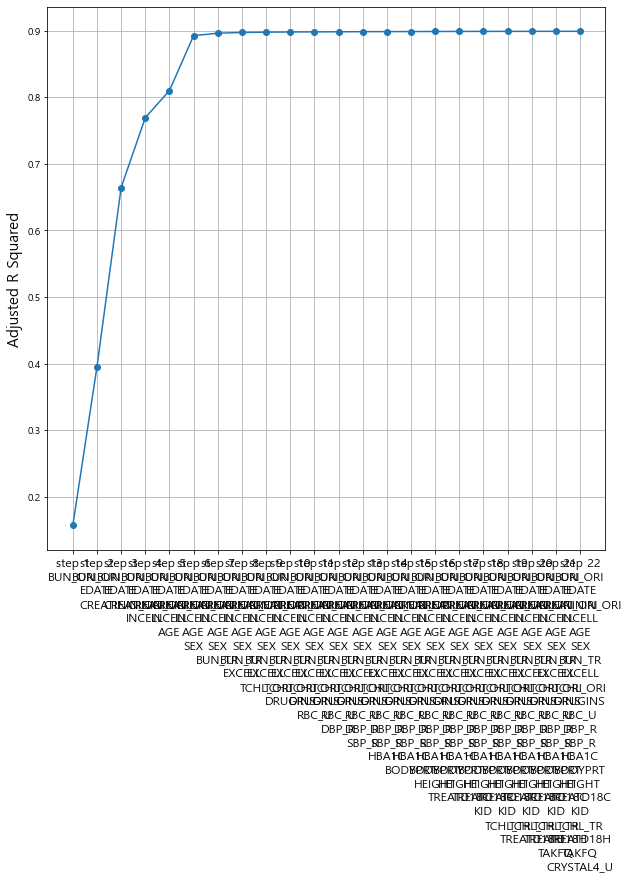

In [270]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squarFed, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()